## Goal: Build a Linear Regression Model with Sines + Cosines

- Load the Joe Biden, Donald Trump Polls
- Build the Dataframe, as done previously
- Add sines and cosines of certain periods
- Build a regression model for each candidate!

In [14]:
from realclearpolling import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
#Load in the joe biden, donald trump data

df = clean_data(get_poll_data())
df.head()


,pollster,date,sample,moe,Trump (R),Biden (D),spread,Difference,Type of Voter,Sample Size,End Date,Poll Month,Year,Days Since 01-01-23
0,Economist/YouGov,2/25 - 2/27,1498 RV,3.2,44.0,44.0,Tie,0.0,RV,1498,2024-02-27,2,2024,422
1,Morning Consult,2/23 - 2/25,6224 RV,1.0,44.0,43.0,Trump+1,1.0,RV,6224,2024-02-25,2,2024,420
2,Harvard-Harris,2/21 - 2/22,2022 RV,—,53.0,47.0,Trump+6,6.0,RV,2022,2024-02-22,2,2024,417
3,Economist/YouGov,2/18 - 2/20,1360 RV,3.2,43.0,42.0,Trump+1,1.0,RV,1360,2024-02-20,2,2024,415
4,HarrisX**,2/20 - 2/22,3024 RV,1.8,52.0,48.0,Trump+4,4.0,RV,3024,2024-02-22,2,2024,417


In [66]:
# Add sines and cosines of the day of the year to the data
df['sinfreq1'] = np.sin(np.pi*df['End Date'].dt.dayofyear/180)
df['cosfreq1'] = np.cos(np.pi*df['End Date'].dt.dayofyear/180)
df['sinfreq2'] = np.sin(240*np.pi*df['End Date'].dt.dayofyear/180)
df['cosfreq2'] = np.cos(240*np.pi*df['End Date'].dt.dayofyear/180)
df['sinfreq3'] = np.sin(360*np.pi*df['End Date'].dt.dayofyear/180)
df['cosfreq3'] = np.cos(360*np.pi*df['End Date'].dt.dayofyear/180)

In [82]:
# We'll use the pollster, sine and cosine of the day of the year as features
#X = df[['sinfreq1', 'cosfreq1', 'sinfreq2', 'cosfreq2', 'sinfreq3', 'cosfreq3']]
X = df[['sinfreq1','cosfreq1','sinfreq2','cosfreq2','sinfreq3','cosfreq3']]
Xtrain = X[df["End Date"] < "2024-01-01"]
Xtest = X[df["End Date"] > "2024-01-01"]
#X = pd.get_dummies(X, drop_first=True)
jby = df["Biden (D)"]
dty = df["Trump (R)"]

jbytrain = jby[df["End Date"] < "2024-01-01"]
jbytest = jby[df["End Date"] > "2024-01-01"]
dtytrain = dty[df["End Date"] < "2024-01-01"]
dtytest = dty[df["End Date"] > "2024-01-01"]
# Fit the model
jbmodel = LinearRegression()
jbmodel.fit(X, jby)
jbpredictions = jbmodel.predict(X)

dtmodel = LinearRegression()
dtmodel.fit(X, dty)
dtpredictions = dtmodel.predict(X)



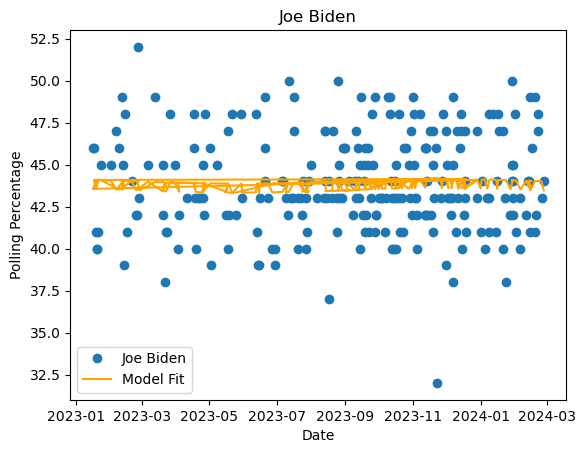

In [87]:
# Plot a time series of the polls and then the fit from the model
#dates = df[df["End Date"] > '2024-01-01']["End Date"]
dates = df["End Date"]
plt.plot(dates, jby, 'o', label='Joe Biden')
plt.plot(dates, jbpredictions, label='Model Fit', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Joe Biden')
plt.legend()
plt.show()

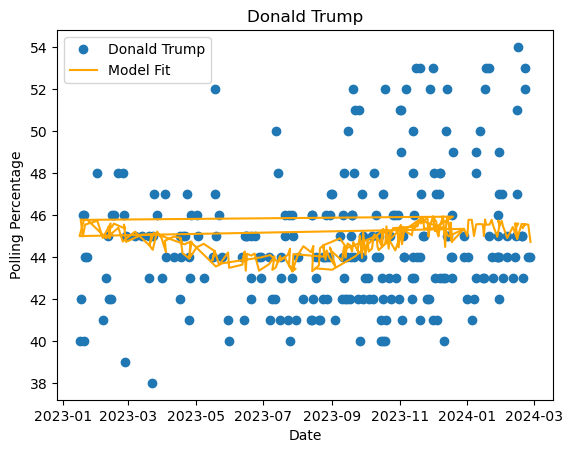

In [88]:
plt.plot(df["End Date"], dty, 'o', label='Donald Trump')
plt.plot(df["End Date"], dtpredictions, label='Model Fit', color = 'orange')
plt.xlabel('Date')
plt.ylabel('Polling Percentage')
plt.title('Donald Trump')
plt.legend()
plt.show()